# **Optimalisasi Campaign Marketing berdasarkan Data Bank Marketing Target menggunakan Pemodelan untuk meningkatkan keuntungan**

**Project Overview :**

**Dataset** = [Klik disini](https://www.kaggle.com/datasets/prakharrathi25/banking-dataset-marketing-targets)

**TimeFrame** = 2008 - 2010

**Background :**

🏦 **Bank Portugal** merupakan salah satu bank yang berada di Negara Portugal , pada tahun 2008 - 2010 , Bank portugal memiliki nasabah sebanyak **45.211 Nasabah** yang berada pada dataset yang tersedia. Namun pada tahun **2008 - 2012** beberapa negara di **Eropa mengalami Resesi Hebat** Menyebabkan Tantangan Di sektor Ekonomi. Karena hal ini Bank Portugal berusaha **menjaga CashFlow perusahaan** dengan fokus pada hal yang lebih **efisien** dalam hal waktu,biaya dan fokus pada Target **Nasabah Potensial.** 💡



## **Problem Statement**

🏦Bank memiliki berbagai rencana pemasaran untuk menjual deposito berjangka kepada nasabah mereka, seperti pemasaran melalui email, iklan, pemasaran telepon, dan pemasaran digital. **Pemasaran telepon** masih menjadi salah satu cara paling efektif untuk medapatkan orang-orang. Namun, itu membutuhkan **investasi besar untuk call centers**. Meskipun telah dilakukan upaya besar, tingkat konversi tetap rendah. Oleh karena itu, sangat penting untuk mengidentifikasi pelanggan yang paling mungkin akan mendaftar sebelumnya sehingga mereka dapat ditargetkan **secara khusus melalui panggilan telepon** 📞

**Goals : 💡**

* **Meningkatkan tingkat langganan deposito berjangka** dengan mengidentifikasi dan menargetkan pelanggan yang **paling mungkin berlangganan.**

**Objective : 🎯**
* **Mengidentifikasi karakteristik** demografi dan finansial yang berhubungan dengan tingkat langganan yang lebih tinggi.
* **Mengembangkan model prediktif** yang dapat memprediksi berdasarkan kemungkinan mereka berlangganan.
* **Memberikan wawasan** yang dapat ditindaklanjuti kepada tim pemasaran untuk meningkatkan penargetan kampanye.


## **Bussines Metrics**

* **Conversion Rate :** Persentase individu yang berlangganan deposito berjangka setelah kampanye.

* **Return on Investment (ROI):**  Pengembalian finansial yang dihasilkan dari kampanye relatif terhadap biayanya.



## **Data Overview**

In [1]:
# Import library yang digunakan
import pandas as pd

# Proses ekstraksi data
df = pd.read_csv('train.csv', sep = ';')

# Tampilkan hasilnya

display(df)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


### **Data Dictionary**

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


Berikut adalah deskripsi yang lebih jelas dan detail untuk setiap kolom dalam dataset:

1. **age**: Umur nasabah (tipe numerik).
2. **job**: Jenis pekerjaan nasabah (kategori: "admin.", "unknown", "unemployed", "management", "housemaid", "entrepreneur", "student", "blue-collar", "self-employed", "retired", "technician", "services").
3. **marital**: Status perkawinan nasabah (kategori: "married", "divorced", "single"; catatan: "divorced" mencakup cerai atau janda/duda).
4. **education**: Tingkat pendidikan nasabah (kategori: "unknown", "secondary", "primary", "tertiary").
5. **default**: Indikator apakah nasabah memiliki kredit macet (biner: "yes", "no").
6. **balance**: Saldo rata-rata tahunan dalam euro untuk rekening bank nasabah (tipe numerik).
7. **housing**: Indikator apakah nasabah memiliki pinjaman rumah (biner: "yes", "no").
8. **loan**: Indikator apakah nasabah memiliki pinjaman pribadi (biner: "yes", "no").
9. **contact**: Jenis komunikasi yang digunakan untuk menghubungi nasabah (kategori: "unknown", "telephone", "cellular").
10. **day**: Hari dalam bulan saat nasabah terakhir kali dihubungi (tipe numerik).
11. **month**: Bulan dalam setahun saat nasabah terakhir kali dihubungi (kategori: "jan", "feb", "mar", "apr", "may", "jun", "jul", "aug", "sep", "oct", "nov", "dec").
12. **duration**: Durasi kontak terakhir dalam detik (tipe numerik).
13. **campaign**: Jumlah kontak selama kampanye ini dan untuk nasabah ini (tipe numerik, termasuk kontak terakhir).
14. **pdays**: Jumlah hari yang berlalu setelah nasabah terakhir kali dihubungi dalam kampanye sebelumnya (tipe numerik, -1 berarti nasabah tidak dihubungi sebelumnya).
15. **previous**: Jumlah kontak yang dilakukan sebelum kampanye ini untuk nasabah ini (tipe numerik).
16. **poutcome**: Hasil kampanye pemasaran sebelumnya (kategori: "unknown", "other", "failure", "success").
17. **y**: Respons target, menunjukkan apakah nasabah telah berlangganan deposito berjangka (biner: "yes", "no").

Harapannya dapat lebih jelas terkait dari data.

In [3]:
# Melakukan pengkategorian kelompok untuk dapat menilai , nilai statistik
cats = ['job','marital','education','default','housing','loan','contact','month','poutcome','y']
num = ['age', 'balance','day','duration','campaign','pdays','previous']

In [4]:
df[num].describe().T

,count,mean,std,min,25%,50%,75%,max
age,45211.0,40.936210,10.618762,18.0,33.0,39.0,48.0,95.0
balance,45211.0,1362.272058,3044.765829,-8019.0,72.0,448.0,1428.0,102127.0
day,45211.0,15.806419,8.322476,1.0,8.0,16.0,21.0,31.0
duration,45211.0,258.163080,257.527812,0.0,103.0,180.0,319.0,4918.0
campaign,45211.0,2.763841,3.098021,1.0,1.0,2.0,3.0,63.0
pdays,45211.0,40.197828,100.128746,-1.0,-1.0,-1.0,-1.0,871.0
previous,45211.0,0.580323,2.303441,0.0,0.0,0.0,0.0,275.0


Dari data statistik masih **terlihat normal dan tidak terlalu jauh perbedaan**, Mungkin yang perlu menjadi catatan adalah nilai std atau standar deviasi yang lumayan jauh dari mean melihat dari Kolom Balance. Pada nilai min memiliki Nilai minus yang berarti **ada yang memiliki hutang / Pinjaman yang disebut Loan.**

In [5]:
df[cats].describe().T

,count,unique,top,freq
job,45211,12,blue-collar,9732
marital,45211,3,married,27214
education,45211,4,secondary,23202
default,45211,2,no,44396
housing,45211,2,yes,25130
loan,45211,2,no,37967
contact,45211,3,cellular,29285
month,45211,12,may,13766
poutcome,45211,4,unknown,36959
y,45211,2,no,39922


### **Insight dari Data Categorical :**
1. Dari data Job dilihat bahwa **Blue Collar** menjadi top Job,
2. kemudian Marital **Married**, Education **secondary**,
3. dan untuk default ( Kemacetan pengunaan Card ) kebanyakan **tidak ada masalah**,
4. Kebanyakan **memiliki rumah** pada kolom housing,
5. Data hutang didominasi dengan jawaban **tidak** ,
6. yang mana dari data bank tersebut kebanyakan menghubungi lewat **celular**,
7. dengan bulan yang paling banyak dihubungi adalah bulan **mei**,
8. kemudian hasil campain didominasi dengan tidak diketahui,
dengan kebanyakan pelangan tidak melanjutkan deposito sekitar 39922 dari 45211 dimana hal ini berarti **88.29% belum berdeposito berjangka panjang.**

### **Mencari Missing Value**

In [6]:
# melihat jmlah missing value pada setiap kolom dari Dataset Bank Marketing Target
missing_values_count = df.isnull().sum()

# menampilkan hasil dari perhitungan missing Value
print("Jumlah missing values per kolom:")
print(missing_values_count)

Jumlah missing values per kolom:
age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64


Bisa dilihat bahwa Dataset Dari Bank Marketing Target **tidak memiliki Missing Value** Sehingga tidak diperlukan dilakukan Hanling Missing Value.

### **Melakukan Checking Duplicate Data**

In [7]:
# Melakukan Cheking untuk mendeteksi data duplikat
df.isna().sum()

df.duplicated().sum()

0

## **Exploratory Data Analysis**

Melakukan Feature Extractions untuk menambah Insight dari EDA

In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

### 1. Feature Extraction : **Conversion Rate by Age Group**


In [9]:
# Membuat kolom age_group
df['age_group'] = pd.cut(df['age'], bins=[0, 25, 35, 45, 55, 100], labels=['<25', '25-35', '36-45', '46-55', '>55'])
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,age_group
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no,>55
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no,36-45
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no,25-35
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no,46-55
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no,25-35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes,46-55
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes,>55
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes,>55
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no,>55


In [10]:
# Menghitung conversion rate berdasarkan age_group dengan observed=False untuk menghilangkan peringatan
# Convert 'yes' to 1 and 'no' to 0 in the 'y' column
df['y'] = df['y'].replace({'yes': 1, 'no': 0})

# Ensure there are no invalid values in the 'y' column
# Optionally, remove rows with invalid values
df = df[df['y'].isin([1, 0])]

# Now perform the groupby operation
df['conversion_rate_by_age'] = df.groupby('age_group', observed=False)['y'].mean() * 100


In [11]:
# Hitung jumlah nilai unik dalam kolom 'y'
df_bar = df['y'].value_counts().reset_index()
df_bar.columns = ['Status', 'Jumlah']

# Buat grafik batang dengan warna khusus dan format angka tidak disingkat
fig = px.bar(
    df_bar,
    x='Status',
    y='Jumlah',
    title='Distribusi Data Konsumen yang Berlangganan pada Deposito Jangka Panjang',
    labels={'Status': 'Status Langganan', 'Jumlah': 'Jumlah Konsumen'},
    text='Jumlah',
    color='Status',
    color_discrete_map={'0': 'darkblue', '1': 'green'}  # Warna khusus
)

# Tambahkan detail angka pada batang dengan format tidak disingkat
fig.update_traces(texttemplate='%{text:,}', textposition='outside')

# Sesuaikan layout untuk memastikan tidak ada teks yang terpotong dan mengubah latar belakang
fig.update_layout(
    uniformtext_minsize=8,
    uniformtext_mode='hide',
    yaxis={'tickformat': ',d'},  # Format angka tidak disingkat pada sumbu y
    plot_bgcolor='white',  # Mengubah latar belakang plot menjadi putih
    paper_bgcolor='white'  # Mengubah latar belakang keseluruhan menjadi putih
)

fig.show()

In [12]:
conversion_rate_by_age = df.groupby('age_group')['y'].mean() * 100

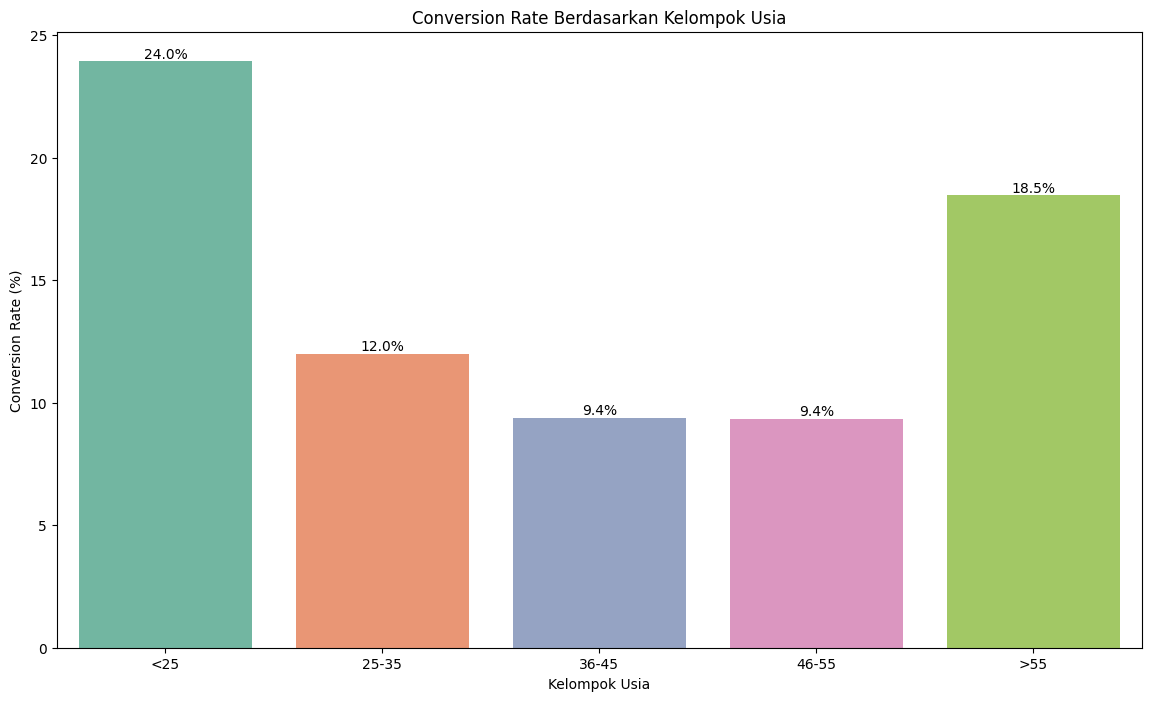

In [13]:
# Ubah hasil menjadi DataFrame untuk kemudahan plotting
conversion_rate_df = conversion_rate_by_age.reset_index()
conversion_rate_df.columns = ['age_group', 'conversion_rate']

# Membuat grafik batang conversion rate berdasarkan kelompok usia
fig, ax = plt.subplots(figsize=(14, 8))
sns.barplot(data=conversion_rate_df, x='age_group', y='conversion_rate', palette='Set2', ax=ax)
ax.set_title('Conversion Rate Berdasarkan Kelompok Usia')
ax.set_xlabel('Kelompok Usia')
ax.set_ylabel('Conversion Rate (%)')

# Menambahkan detail angka pada grafik
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height:.1f}%',  # Menambahkan persen di belakang angka
                (p.get_x() + p.get_width() / 2., height),
                ha='center', va='center',
                xytext=(0, 5),
                textcoords='offset points')

plt.show()

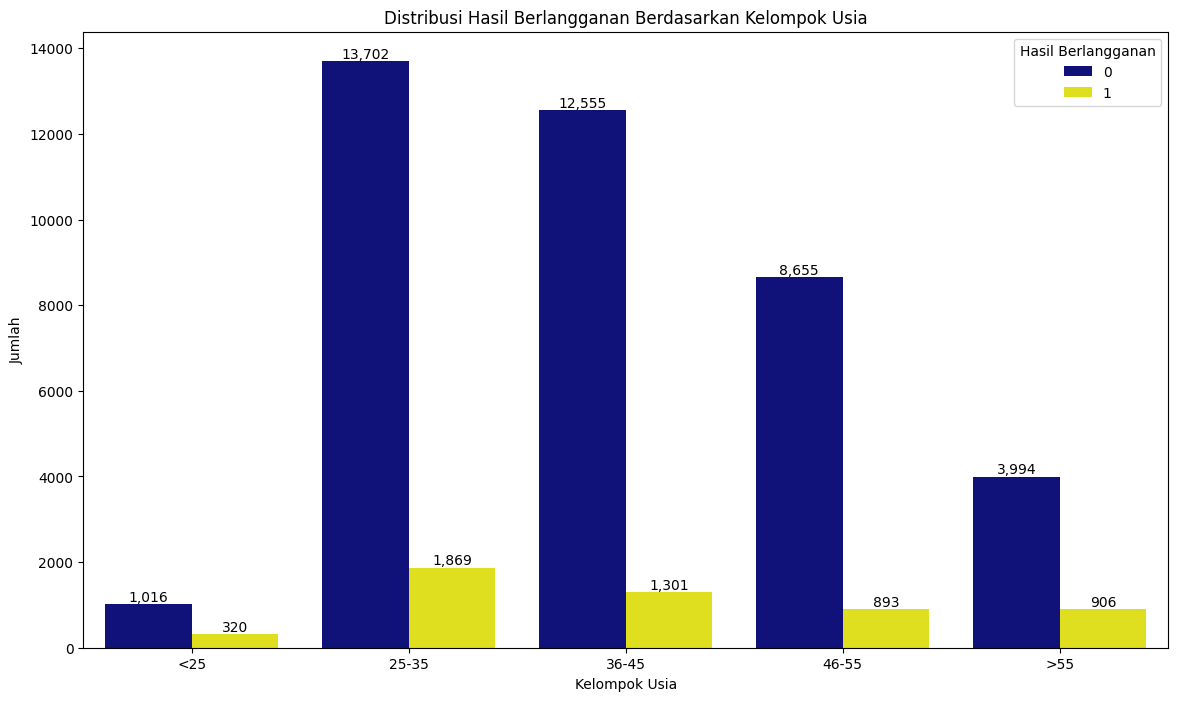

In [14]:
# Misalkan 'df' adalah DataFrame asli yang sudah berisi kolom 'age_group' dan 'y'

# Menghitung jumlah pelanggan dan non-pelanggan berdasarkan kelompok usia
conversion_rate_df1 = df.groupby(['age_group', 'y']).size().reset_index(name='count')

# Buat palet warna manual untuk hue 'y'
palette = {0: 'darkblue', 1: 'yellow'}

# Membuat grafik batang distribusi hasil kampanye berdasarkan kelompok usia
fig, ax = plt.subplots(figsize=(14, 8))
sns.barplot(data=conversion_rate_df1, x='age_group', y='count', hue='y', palette=palette, ax=ax)
ax.set_title('Distribusi Hasil Berlangganan Berdasarkan Kelompok Usia')
ax.set_xlabel('Kelompok Usia')
ax.set_ylabel('Jumlah')
ax.legend(title='Hasil Berlangganan')

# Menambahkan detail angka pada grafik
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{int(height):,}',  # Tambahkan format angka tidak disingkat
                (p.get_x() + p.get_width() / 2., height),
                ha='center', va='center',
                xytext=(0, 5),
                textcoords='offset points')

plt.show()


### 2. Conversion **Rate by Campaign Efficiency**

Kita membuat Feature Extraction Conversion Rate by Campaign Efficieny

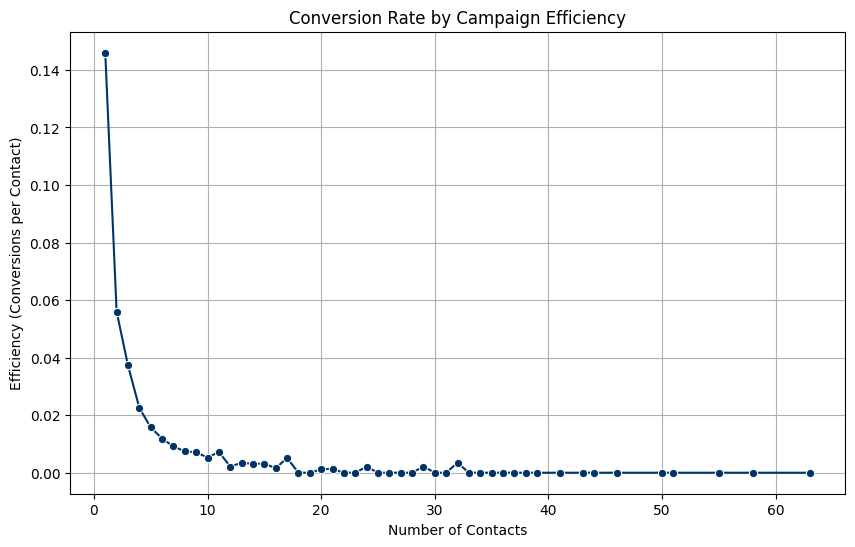

In [15]:
# Membuat kolom campaign_efficiency
df['campaign_efficiency'] = df['y'] / df['campaign']

# Menghitung rata-rata campaign efficiency
efficiency_by_campaign = df.groupby('campaign')['campaign_efficiency'].mean()

# Membuat line plot dengan warna biru dongker
plt.figure(figsize=(10, 6))
sns.lineplot(x=efficiency_by_campaign.index, y=efficiency_by_campaign.values, marker='o', color='#003366')
plt.title('Conversion Rate by Campaign Efficiency')
plt.xlabel('Number of Contacts')
plt.ylabel('Efficiency (Conversions per Contact)')
plt.grid(True)
plt.show()

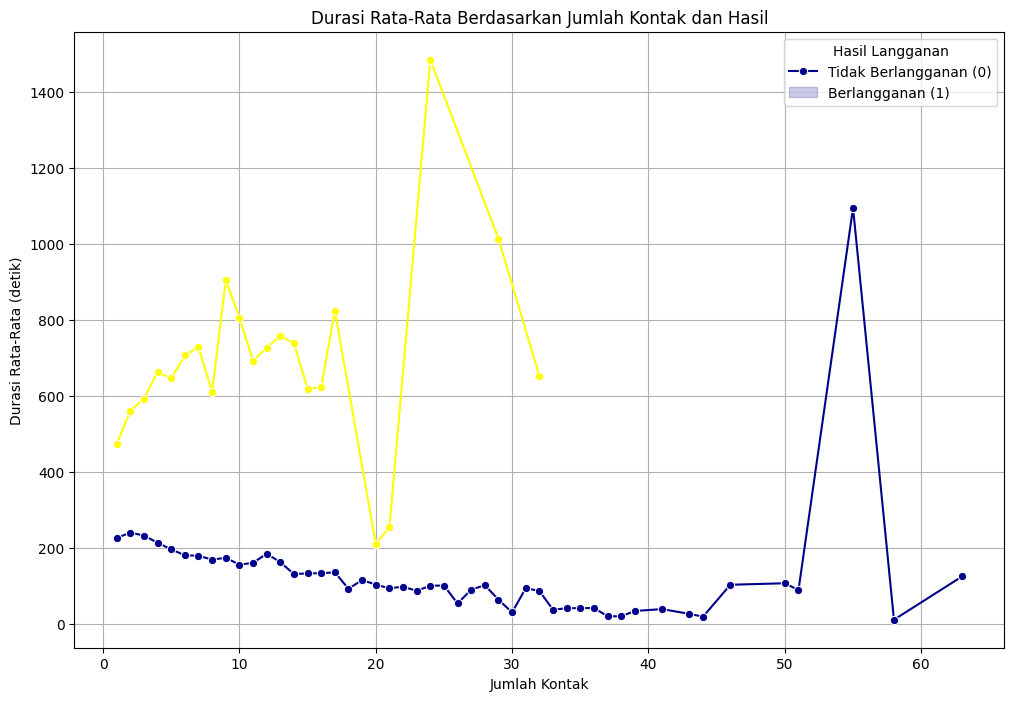

In [16]:
# Menghitung rata-rata durasi berdasarkan jumlah kontak (campaign) dan hasil (y)
# Kita akan menghitung rata-rata durasi untuk setiap kombinasi jumlah kontak dan hasil
average_duration = df.groupby(['campaign', 'y'])['duration'].mean().reset_index()

# Membuat grafik line plot untuk durasi rata-rata
plt.figure(figsize=(12, 8))
sns.lineplot(data=average_duration, x='campaign', y='duration', hue='y', marker='o', palette={0: 'darkblue', 1: 'yellow'})
plt.title('Durasi Rata-Rata Berdasarkan Jumlah Kontak dan Hasil')
plt.xlabel('Jumlah Kontak')
plt.ylabel('Durasi Rata-Rata (detik)')
plt.legend(title='Hasil Langganan', labels=['Tidak Berlangganan (0)', 'Berlangganan (1)'])
plt.grid(True)
plt.show()

### 3. Return on Investment (ROI) **Estimation by Contact Type**

**1. Telemarketing Cost per Person** :  18,6 Euro ( Dimana Cost per Contact 6,88 Euro * 2,71 ( Average Number of Contact during campaign)

**2. Total Biaya Telemarketing Campaign**

45211 x 18,6 = 840.924

**3. Average Deposit per Person** :


### 4. Conversion Rate by **Previous Outcome**

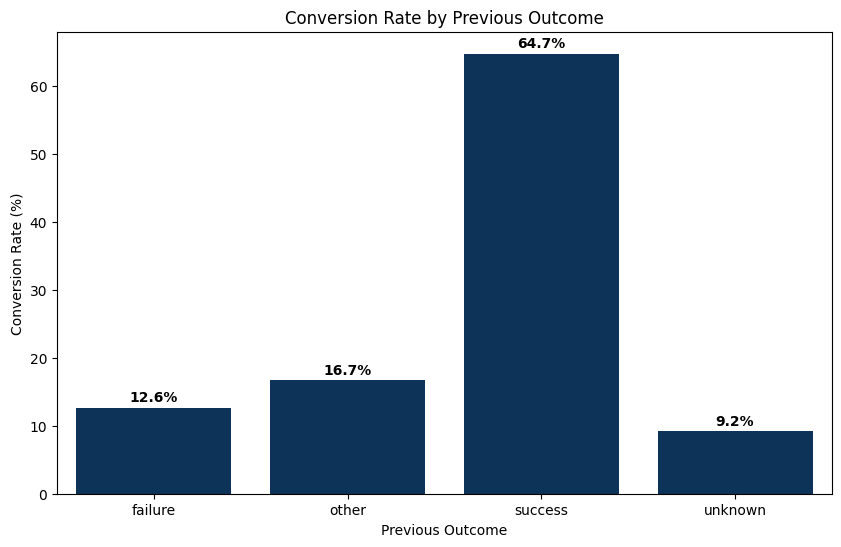

In [17]:
# Menghitung conversion rate berdasarkan poutcome
conversion_rate_by_poutcome = df.groupby('poutcome')['y'].mean() * 100

# Membuat stacked bar plot dengan warna biru tua
plt.figure(figsize=(10, 6))
sns.barplot(x=conversion_rate_by_poutcome.index, y=conversion_rate_by_poutcome.values, palette=['#003366'])
plt.title('Conversion Rate by Previous Outcome')
plt.xlabel('Previous Outcome')
plt.ylabel('Conversion Rate (%)')

# Menambahkan detail angka pada batang
for i in range(len(conversion_rate_by_poutcome)):
    plt.text(i, conversion_rate_by_poutcome.values[i] + 0.5, f'{conversion_rate_by_poutcome.values[i]:.1f}%',
             ha='center', va='bottom', color='black', fontweight='bold')

plt.show()

### 5. Conversion Rate **by Loan and Housing Status**

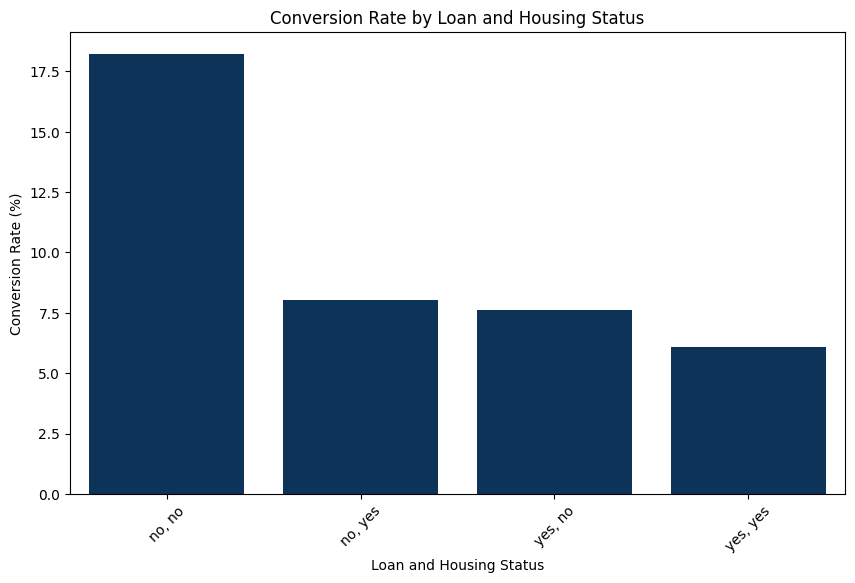

In [18]:
# Membuat kolom loan_housing_status
df['loan_housing_status'] = df['loan'] + ', ' + df['housing']

# Menghitung conversion rate berdasarkan loan_housing_status
conversion_rate_by_loan_housing = df.groupby('loan_housing_status')['y'].mean() * 100

# Membuat grouped bar plot dengan warna biru tua
plt.figure(figsize=(10, 6))
sns.barplot(x=conversion_rate_by_loan_housing.index, y=conversion_rate_by_loan_housing.values, color='#003366')
plt.title('Conversion Rate by Loan and Housing Status')
plt.xlabel('Loan and Housing Status')
plt.ylabel('Conversion Rate (%)')
plt.xticks(rotation=45)
plt.show()

## **Data Prepocessing**

In [19]:
df = pd.read_csv('train.csv', sep = ';')

In [20]:
# Konversi kolom 'y' ke numerik (yes -> 1, no -> 0) langsung pada kolom 'y'
df['y'] = df['y'].map({'yes': 1, 'no': 0})

In [21]:
df['age_group'] = pd.cut(df['age'], bins=[0, 25, 35, 45, 55, 100], labels=['<25', '25-35', '36-45', '46-55', '>55'])

In [22]:
df.drop(['duration', 'day', 'campaign'], axis=1, inplace=True)

In [23]:
df_cleaned = df

In [24]:
df_cleaned.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'month', 'pdays', 'previous', 'poutcome', 'y',
       'age_group'],
      dtype='object')

In [25]:
df_cleaned.head()

,age,job,marital,education,default,balance,housing,loan,contact,month,pdays,previous,poutcome,y,age_group
0,58,management,married,tertiary,no,2143,yes,no,unknown,may,-1,0,unknown,0,>55
1,44,technician,single,secondary,no,29,yes,no,unknown,may,-1,0,unknown,0,36-45
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,may,-1,0,unknown,0,25-35
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,may,-1,0,unknown,0,46-55
4,33,unknown,single,unknown,no,1,no,no,unknown,may,-1,0,unknown,0,25-35


In [26]:
one_hot_encoding_column = ['month', 'marital', 'job', 'contact','poutcome']
label_encoding_column = ['education', 'default', 'housing','loan', 'age_group']
numerical_columns = ['age', 'balance', 'pdays', 'previous']

In [27]:
from sklearn.preprocessing import OneHotEncoder, RobustScaler, LabelEncoder, StandardScaler


# Step 4: One-hot encode categorical columns
one_hot_encoder = OneHotEncoder(sparse_output=False)
encoded_categorical = one_hot_encoder.fit_transform(df_cleaned[one_hot_encoding_column])

# Convert the encoded columns to a DataFrame with the same index as df_cleaned
df_encoded = pd.DataFrame(encoded_categorical, columns=one_hot_encoder.get_feature_names_out(one_hot_encoding_column), index=df_cleaned.index)

# Step 5: Prepare the final DataFrame
df_processed = df_cleaned.copy()

# Drop the original categorical columns and concatenate the encoded columns
df_processed = df_processed.drop(one_hot_encoding_column, axis=1)
df_processed = pd.concat([df_processed, df_encoded], axis=1)


In [28]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler, LabelEncoder

# Step 4: Label encode categorical columns
label_encoder = LabelEncoder()
for col in label_encoding_column:
    df_processed[col] = label_encoder.fit_transform(df_processed[col])




In [29]:
# Pisahkan fitur dan target
X = df_processed.drop('y', axis=1)  # Fitur
y = df_processed['y']  # Target

In [30]:
# Pisahkan data menjadi data latih dan data uji
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [31]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [32]:
# Tampilkan jumlah sampel untuk memverifikasi
print("Jumlah data y sebelum SMOTE:")
print(y_train.value_counts())

print("\nJumlah data y setelah SMOTE:")
print(pd.Series(y_train_resampled).value_counts())

Jumlah data y sebelum SMOTE:
y
0    31937
1     4231
Name: count, dtype: int64

Jumlah data y setelah SMOTE:
y
0    31937
1    31937
Name: count, dtype: int64


## **Modeling**

In [33]:
from lazypredict.Supervised import LazyClassifier
reg = LazyClassifier(verbose=0, custom_metric=None, predictions=True)
models, predictions = reg.fit(X_train_resampled, X_test, y_train_resampled, y_test)
models

100%|██████████| 29/29 [13:02<00:00, 26.97s/it] 


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
GaussianNB,0.81,0.69,0.69,0.83,0.30
QuadraticDiscriminantAnalysis,0.84,0.68,0.68,0.85,0.39
NearestCentroid,0.69,0.68,0.68,0.74,0.16
BernoulliNB,0.75,0.67,0.67,0.79,0.22
LogisticRegression,0.76,0.67,0.67,0.79,0.32
NuSVC,0.87,0.67,0.67,0.87,403.87
CalibratedClassifierCV,0.75,0.67,0.67,0.79,86.46
LinearSVC,0.75,0.67,0.67,0.79,20.72
RidgeClassifier,0.74,0.67,0.67,0.78,0.27


In [40]:
# from xgboost import XGBClassifier
# from sklearn.model_selection import RandomizedSearchCV, KFold, GridSearchCV

# # Initialize XGBClassifier
# xgb_classifier = XGBClassifier(
#     random_state=42, eval_metric='logloss')

# # Cross-validation strategy (reduced to 3 folds for speed)
# cv = KFold(n_splits=3, random_state=123, shuffle=True)

# # Define a narrower parameter grid with fewer values for faster search
# param_grid = {
#     'n_estimators': [100, 150],
#     'learning_rate': [0.05, 0.1],
#     'max_depth': [3, 5],
#     'min_child_weight': [1, 2],
#     'subsample': [0.8, 0.9],
#     'colsample_bytree': [0.8, 0.9],
#     'gamma': [0, 0.1],
#     'reg_alpha': [0, 0.05],
#     'reg_lambda': [1, 0.5]
# }

# # Use GridSearchCV with param_grid
# grid_search = GridSearchCV(
#     estimator=xgb_classifier,
#     param_grid=param_grid,  # Use param_grid here
#     cv=cv,
#     n_jobs=-1,
#     verbose=1
# )

# # Fit the model
# grid_search.fit(X_train_resampled, y_train_resampled)

# # Get the best parameters
# best_params = grid_search.best_params_
# print("Best parameters found: ", best_params)


In [41]:
import xgboost as xgb
import lightgbm as lgb
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, f1_score

# Best parameters found:  {'colsample_bytree': 1.0, 'gamma': 0.1, 'learning_rate': 0.1, 'max_depth': 5, 'min_child_weight': 1, 'n_estimators': 200, 'reg_alpha': 0.1, 'reg_lambda': 0.1, 'subsample': 1.0}

# Initialize XGBClassifier with best parameters from GridSearchCV
# model = xgb.XGBClassifier(**best_params)

# model = xgb.XGBClassifier()

# Initialize XGBClassifier with equivalent parameters from GridSearchCV
model = xgb.XGBClassifier(
    colsample_bytree=1.0,
    learning_rate=0.1,
    max_depth=5,
    min_child_weight=1,  # In LGBM, 'min_child_weight' is 'min_child_samples'
    n_estimators=200,
    reg_alpha=0.1,
    reg_lambda=0.1,
    subsample=1.0
)

# Initialize LGBMClassifier with equivalent parameters from GridSearchCV
# model = lgb.LGBMClassifier(
#     colsample_bytree=1.0,
#     learning_rate=0.1,
#     max_depth=5,
#     min_child_weight=1,  # In LGBM, 'min_child_weight' is 'min_child_samples'
#     n_estimators=200,
#     reg_alpha=0.1,
#     reg_lambda=0.1,
#     subsample=1.0
# )

# model = lgb.LGBMClassifier(
#     # class_weight='balanced',     # Automatically adjust class weights
#     # num_leaves=31,
#     # min_data_in_leaf=20,
#     # max_depth=6,
#     # learning_rate=0.01,
#     # n_estimators=2000,
#     # reg_alpha=0.1,
#     # reg_lambda=0.1,
#     # subsample=0.8,
#     # subsample_freq=5
# )

# model = lgb.LGBMClassifier(

# )

# model = RandomForestClassifier(
#     max_depth=5,               # Similar to XGBoost's max_depth
#     n_estimators=200,          # Number of trees in the forest
#     min_samples_split=2,       # Similar to min_child_weight in XGBoost
#     min_samples_leaf=1,        # Smallest leaf node
#     max_features='sqrt',       # Similar to colsample_bytree
#     bootstrap=True,            # Similar to subsample
#     random_state=42            # To make results reproducible
# )
# model = RandomForestClassifier(

# )


# Fit the model on the resampled training data
model.fit(X_train_resampled, y_train_resampled)

# Predict probabilities for the positive class (y=1)
y_pred_proba = model.predict_proba(X_test)[:, 1]

# Predict the class labels
y_pred = model.predict(X_test)

from sklearn.metrics import precision_score

# Predict the class labels for the training data
y_train_pred = model.predict(X_train_resampled)

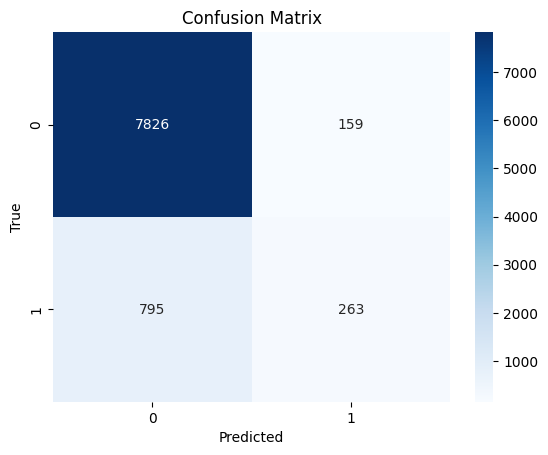

In [42]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['0', '1'], yticklabels=['0', '1'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [43]:
from sklearn.metrics import classification_report, roc_auc_score
# Evaluasi model
print("Classification Report:\n", classification_report(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, y_pred_proba))

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.98      0.94      7985
           1       0.62      0.25      0.36      1058

    accuracy                           0.89      9043
   macro avg       0.77      0.61      0.65      9043
weighted avg       0.87      0.89      0.87      9043

ROC AUC Score: 0.7836238315461528


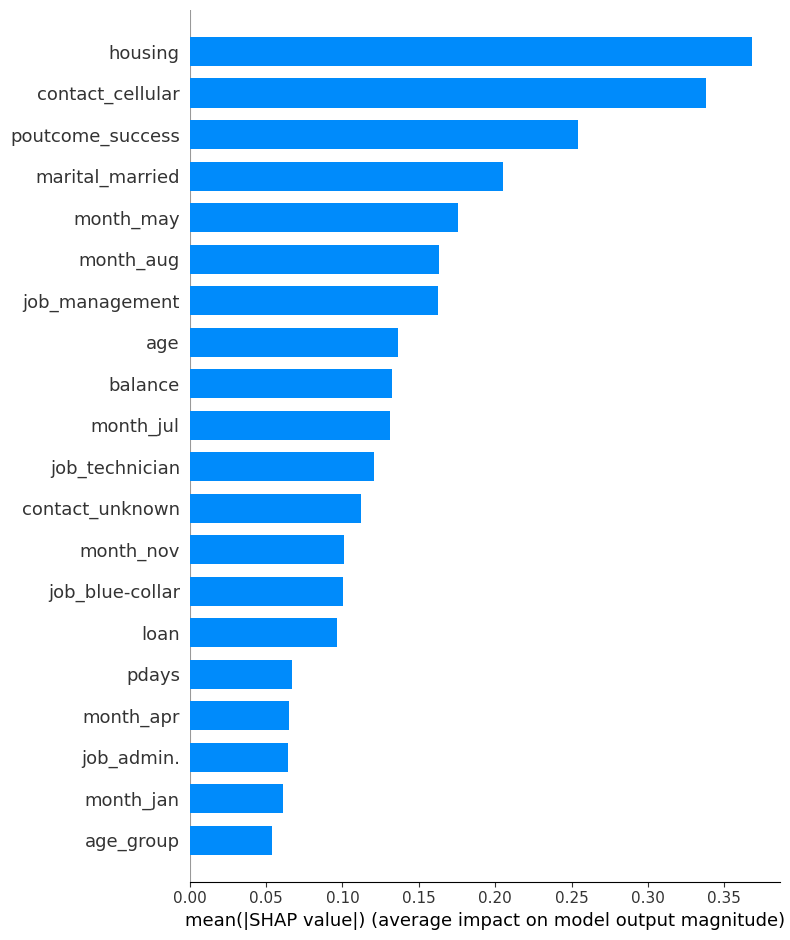

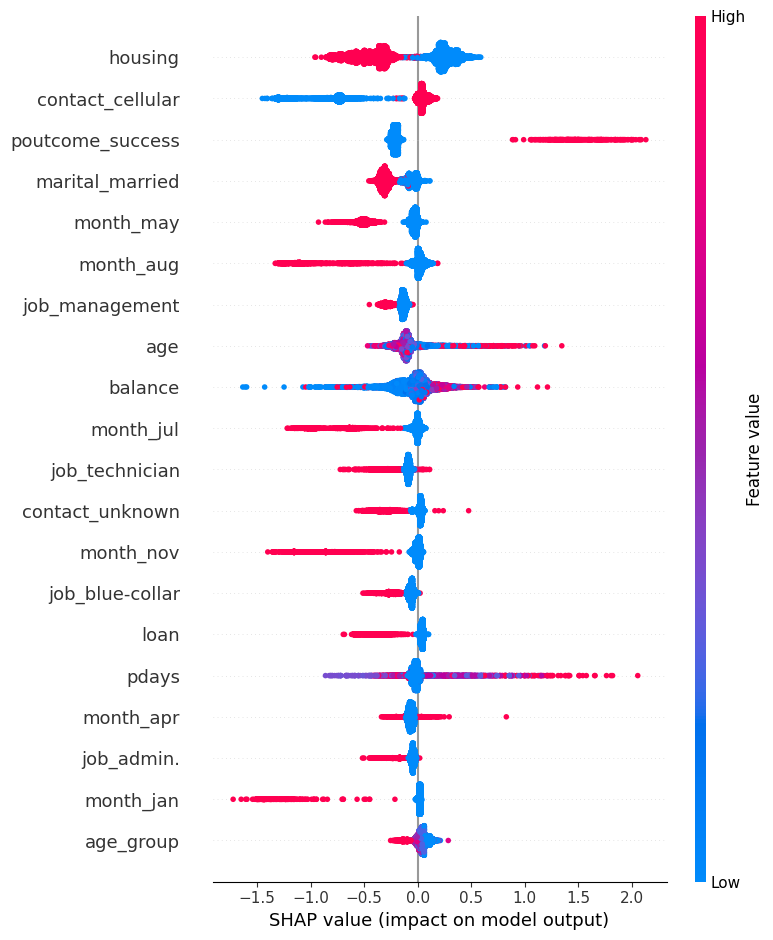

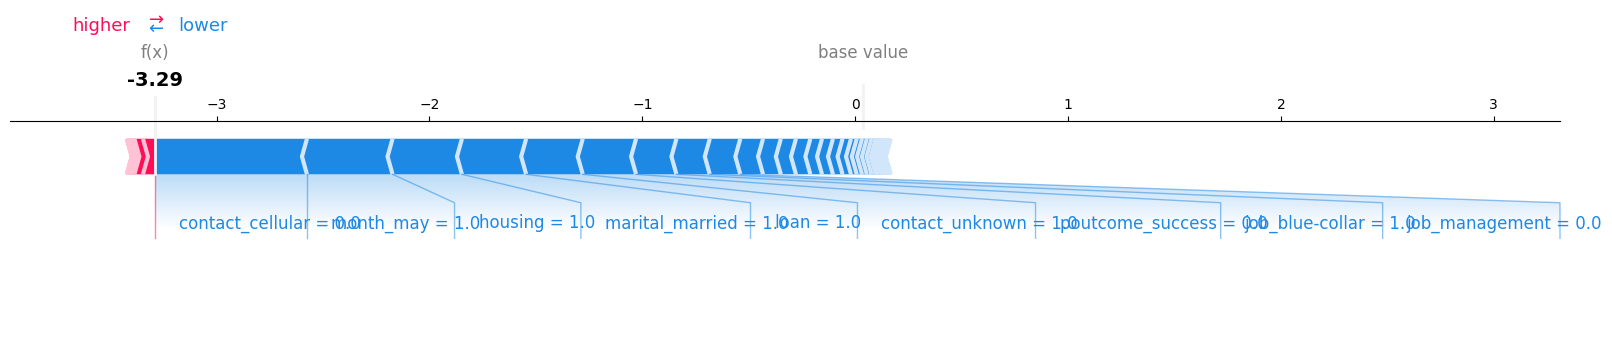

In [44]:
import shap
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Initialize the SHAP explainer
explainer = shap.TreeExplainer(model)

# Calculate SHAP values
shap_values = explainer.shap_values(X_test)

# Handle binary classification case where shap_values is a list
if isinstance(shap_values, list):
    shap_values = shap_values[1]  # Use the SHAP values for class 1

# Convert X_test to a DataFrame if it's not already
if isinstance(X_test, np.ndarray):
    X_test = pd.DataFrame(X_test, columns=feature_names)  # feature_names should be a list of column names

# SHAP summary plot (bar plot of feature importance)
shap.summary_plot(shap_values, X_test, plot_type="bar")

# Detailed SHAP summary plot (beeswarm plot of SHAP values)
shap.summary_plot(shap_values, X_test)

# SHAP dependence plot for a specific feature
# Replace 'feature_name' with the actual feature name you want to analyze
# shap.dependence_plot('day', shap_values, X_test)

# SHAP force plot for a single prediction
# Ensure that X_test is a DataFrame
# shap.force_plot(explainer.expected_value[1], shap_values[1][0:1], X_test.iloc[0,:])
shap.force_plot(explainer.expected_value, shap_values[0, :], X_test.iloc[0, :])
# Initialize JavaScript visualization for SHAP
shap.initjs()

# Create a vertical force plot
shap.force_plot(explainer.expected_value, shap_values[0, :], X_test.iloc[0, :], matplotlib=True)


plt.show()
 # To display the force plot in environments where it might not render automatically

## **Recomendation**